# Zadanie 1 - aktywność słońca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Przydatne mogą być nastąpujące konstrukcje:

array = genfromtxt('spots.txt')  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

Częstotliwość cyklu aktywności słonecznej wynosi 0.08497246262785209 cyklów rocznie.


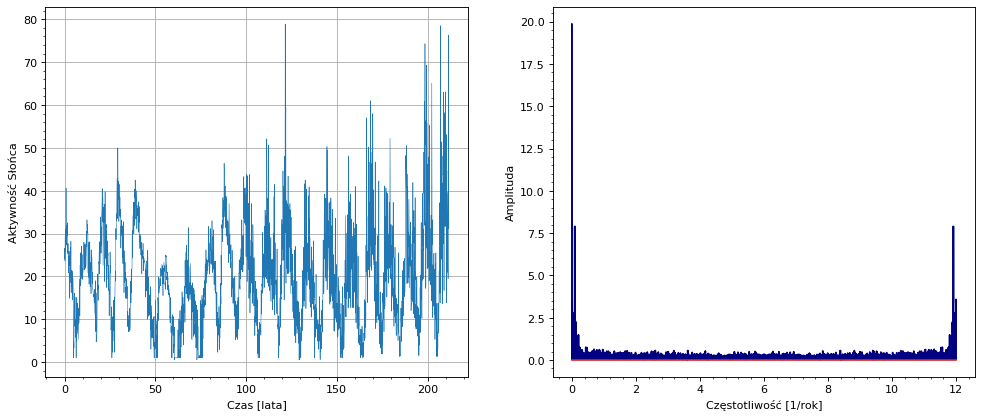

In [2]:
import matplotlib.pylab as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

def draw_sun_signal(file_path: str) -> None:
    signal: np.array = np.genfromtxt(file_path)
    n: int = len(signal)
    t: np.array = np.arange(n) / 12

    fig: plt.figure = plt.figure(figsize=(15, 6), dpi=80)   
    ax: plt.Axes = fig.add_subplot(121)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()
    ax.set_xlabel('Czas [lata]')
    ax.set_ylabel('Aktywność Słońca')

    ax.plot(t, signal, linestyle='-', linewidth=0.5)

    # moduł sygnału w dziedzinie czestotliwosci 
    freq_domain_signal: np.array = abs(np.fft.fft(signal)) / (0.5 * n)
    freq_domain_signal[0] /= 2
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs: np.array = np.linspace(0, 12, n, False)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('Częstotliwość [1/rok]')
    ax.set_ylabel('Amplituda')
    plt.stem(freqs, freq_domain_signal, linefmt='navy', markerfmt='-')

    sun_cycle_freq: float = freqs[np.argmax(freq_domain_signal[1:])]
    print(f'Częstotliwość cyklu aktywności słonecznej wynosi {sun_cycle_freq} cyklów rocznie.')

    plt.show()

draw_sun_signal('data/spots.txt')


# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

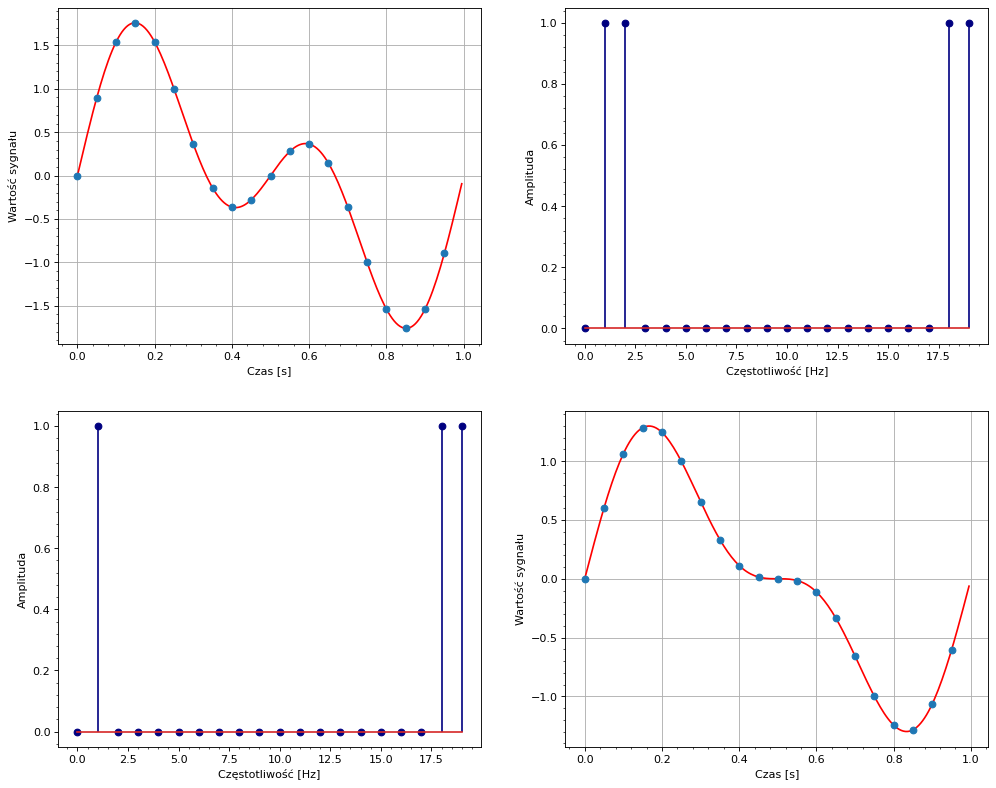

In [3]:
class Signal:
    def __init__(self, amplitude: float, frequency: float=1, func = np.sin) -> None:
        self.amplitude: float = amplitude
        self.frequency: float = frequency
        self.func = func

def draw_signal(signals: list[Signal], time: float=1, sampling_freq: int=20) -> None:
    sampling_interval: float = 1.0 / sampling_freq

    t: np.array = np.arange(0, time, sampling_interval)
    base_t: np.array = np.arange(0, time, 1 / 200)
    n: int = len(t)

    signal: np.array = np.zeros_like(t)
    base_signal: np.array = np.zeros_like(base_t)

    for sig in signals:
        signal += sig.amplitude * sig.func( 2*np.pi * t * sig.frequency)
        base_signal += sig.amplitude * sig.func( 2*np.pi * base_t * sig.frequency)

    fig: plt.figure = plt.figure(figsize=(15, 12), dpi=80)   
    ax: plt.Axes = fig.add_subplot(221)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.plot(t, signal, 'o')

    # moduł sygnału w dziedzinie czestotliwosci
    freq_domain_signal = np.fft.fft(signal)
    base_freq_domain_signal = np.fft.fft(base_signal)
    symetrical_domain_signal: np.array = abs(freq_domain_signal) / (0.5 * n)
    symetrical_domain_signal[0] /= 2
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs: np.array = np.linspace(0, sampling_freq, n, False)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(222)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Amplituda')
    plt.stem(freqs, symetrical_domain_signal, linefmt='navy')

    # usunięcie składowych o częstotliwości 2Hz
    removed_freq = 2

    freq_domain_signal[removed_freq] = 0
    base_freq_domain_signal[removed_freq] = 0
    # freq_domain_signal[-removed_freq] = 0
    # base_freq_domain_signal[-removed_freq] = 0

    new_symetrical_domain_signal = abs(freq_domain_signal) / (0.5 * n)
    new_symetrical_domain_signal[0] /= 2

    ax: plt.Axes = fig.add_subplot(223)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Amplituda')
    plt.stem(freqs, new_symetrical_domain_signal, linefmt='navy')

    # odwrócony fft
    new_signal: np.array = np.real(np.fft.ifft(freq_domain_signal))
    new_base_signal: np.array = np.real(np.fft.ifft(base_freq_domain_signal))

    ax: plt.Axes = fig.add_subplot(224)
    ax.plot(base_t, new_base_signal, linestyle='-', color='red')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.plot(t, new_signal, 'o')
    
draw_signal([Signal(1, 1), Signal(1, 2)], time=1, sampling_freq=20)

# Zadanie 3 - informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla $sin(2*pi*t) + cos(4*pi*t)$. Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

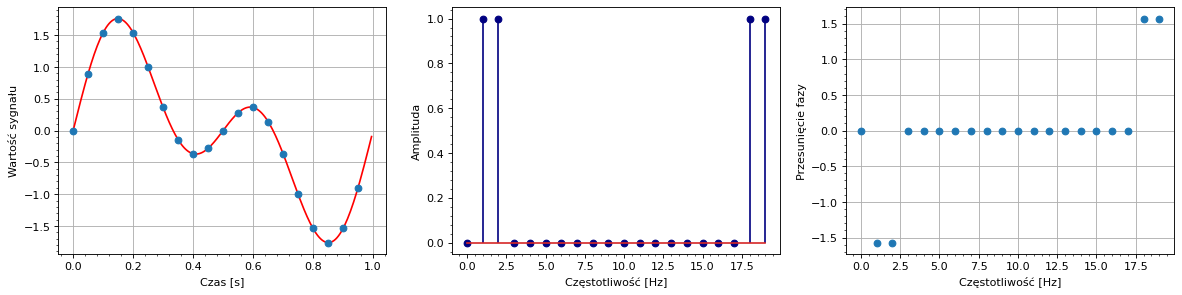

In [4]:
def draw_signal(signals: list[Signal], time: float=1, sampling_freq: int=20) -> None:
    sampling_interval: float = 1.0 / sampling_freq
    
    t: np.array = np.arange(0, time, sampling_interval)
    base_t: np.array = np.arange(0, time, 1 / 200)
    n: int = len(t)

    signal: np.array = np.zeros_like(t)
    base_signal: np.array = np.zeros_like(base_t)

    for sig in signals:
        signal += sig.amplitude * sig.func( 2*np.pi * t * sig.frequency)
        base_signal += sig.amplitude * sig.func( 2*np.pi * base_t * sig.frequency)

    fig: plt.figure = plt.figure(figsize=(18, 4), dpi=80)   
    ax: plt.Axes = fig.add_subplot(131)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.plot(t, signal, 'o')

    # moduł sygnału w dziedzinie czestotliwosci
    freq_domain_signal = np.fft.fft(signal)
    symetrical_domain_signal: np.array = abs(freq_domain_signal) / (0.5 * n)
    symetrical_domain_signal[0] /= 2
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs: np.array = np.linspace(0, sampling_freq, n, False)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(132)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Amplituda')
    plt.stem(freqs, symetrical_domain_signal, linefmt='navy')

    # wykres faz
    phase: np.array = np.angle(freq_domain_signal) * abs(freq_domain_signal) / (0.5 * n)
    phase[0] = 0

    ax: plt.Axes = fig.add_subplot(133)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Przesunięcie fazy')
    ax.plot(freqs, phase, 'o')
    
draw_signal([Signal(1, 1, np.sin), Signal(1, 2, np.sin)], time=1, sampling_freq=20)

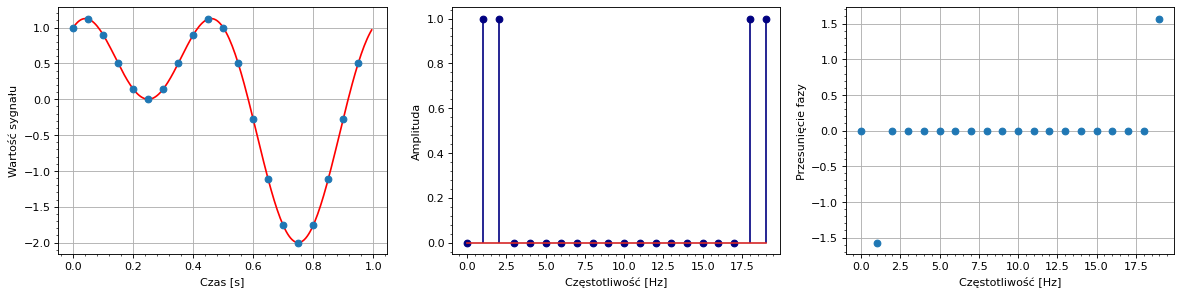

In [5]:
draw_signal([Signal(1, 1, np.sin), Signal(1, 2, np.cos)], time=1, sampling_freq=20)

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

Dominujące w sygnale częstotliwości:
935.89086 Hz, (amplituda 228.79)
936.91931 Hz, (amplituda 182.28)
934.86241 Hz, (amplituda 158.56)
1249.56856 Hz, (amplituda 150.20)
1248.54011 Hz, (amplituda 128.66)


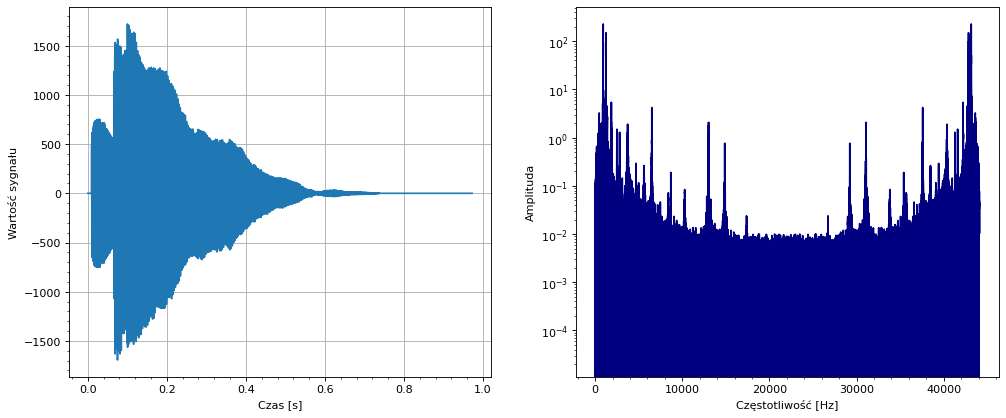

In [32]:
import scipy.io.wavfile

def draw_sound(file_path: str, dominant: int, is_log: bool) -> None:
    
    sampling_freq, signal = scipy.io.wavfile.read(file_path)
    signal = signal[:, 1]
    n: int = len(signal)

    sampling_interval: float = 1 / sampling_freq

    t: np.array = np.arange(0, n/sampling_freq, sampling_interval)

    fig: plt.figure = plt.figure(figsize=(15, 6), dpi=80)   
    ax: plt.Axes = fig.add_subplot(121)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.plot(t, signal)

    freq_domain_signal: np.array = abs(np.fft.fft(signal)) / (0.5 * n)
    freq_domain_signal[0] /= 2

    freqs = np.linspace(0, sampling_freq, n, False)

    ax = fig.add_subplot(122)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Amplituda')
    if is_log: 
        plt.yscale('log')
    plt.stem(freqs, freq_domain_signal, linefmt='navy', markerfmt='-')

    print('Dominujące w sygnale częstotliwości:')
    peaks = np.argsort(freq_domain_signal[:n//2])[-dominant:]  # Największe 5 pików
    for peak in reversed(peaks):
        print(f"{freqs[peak]:.5f} Hz, (amplituda {freq_domain_signal[peak]:.2f})")

    plt.show()

draw_sound('data/err.wav', dominant=5, is_log = True)